# BA820 Project Proposal - Programming Languages EDA

**Team:** A1 Project M1  
**Section:** A1  
**Date:** January 2026

---

## Overview

This notebook explores the Programming Languages Database (PLDB) dataset. It has info on over 4000 programming languages including popularity, when they were created, who made them, and various features.

## 1. Setup and Data Loading

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://drive.google.com/uc?export=download&id=143-R9a1EnjTTQrMLR_GoRwoyRDfET3su')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   pldb_id                            4303 non-null   object 
 1   title                              4303 non-null   object 
 2   description                        823 non-null    object 
 3   type                               4303 non-null   object 
 4   appeared                           4303 non-null   int64  
 5   creators                           1100 non-null   object 
 6   website                            1375 non-null   object 
 7   domain_name                        715 non-null    object 
 8   domain_name_registered             502 non-null    float64
 9   reference                          1989 non-null   object 
 10  isbndb                             1086 non-null   float64
 11  book_count                         4303 non-null   int64

In [89]:
df.head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


## 2. Basic Stats

In [90]:
print("Dataset Overview")
print(f"Total languages: {len(df)}")
print(f"Year range: {df['appeared'].min()} to {df['appeared'].max()}")
print(f"Language types: {df['type'].nunique()}")

Dataset Overview
Total languages: 4303
Year range: -2000 to 2023
Language types: 40


In [91]:
# check missing values for key columns
key_cols = ['number_of_users', 'number_of_jobs', 'book_count', 'appeared', 'type']
for col in key_cols:
    missing = df[col].isna().sum()
    print(f"{col}: {missing} missing ({missing/len(df)*100:.1f}%)")

number_of_users: 0 missing (0.0%)
number_of_jobs: 0 missing (0.0%)
book_count: 0 missing (0.0%)
appeared: 0 missing (0.0%)
type: 0 missing (0.0%)


## 3. Language Types

In [92]:
# what types of languages are there?
type_counts = df['type'].value_counts()
print("Top 10 language types:")
print(type_counts.head(10))

Top 10 language types:
type
pl                 3368
textMarkup           97
queryLanguage        94
xmlFormat            69
dataNotation         68
grammarLanguage      67
esolang              66
template             55
textDataFormat       50
protocol             49
Name: count, dtype: int64


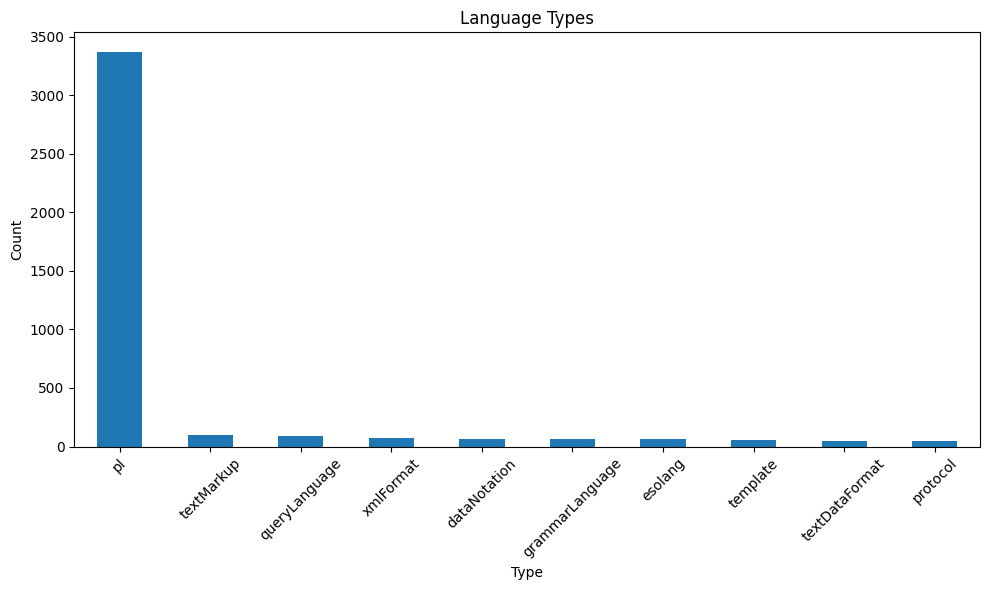

In [93]:
# visualize
plt.figure(figsize=(10, 6))
type_counts.head(10).plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Language Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most are programming languages (pl), but theres also query languages, markup, and others.

## 4. Top Languages

In [94]:
# most popular by users
top_users = df.nlargest(15, 'number_of_users')[['title', 'type', 'appeared', 'number_of_users']]
print("Top 15 by users:")
print(top_users.to_string(index=False))

Top 15 by users:
                       title               type  appeared  number_of_users
                         SQL      queryLanguage      1974          7179119
                  JavaScript                 pl      1995          5962666
                        HTML         textMarkup      1991          5570873
                        Java                 pl      1995          5550123
                         C++                 pl      1985          4128238
                           C                 pl      1972          3793768
                         CSS stylesheetLanguage      1996          2881846
                      Python                 pl      1991          2818037
                      MATLAB                 pl      1984          2661579
                       MySQL      queryLanguage      1995          2608362
                         PHP                 pl      1995          2356101
                         XML       dataNotation      1996          1917452
        

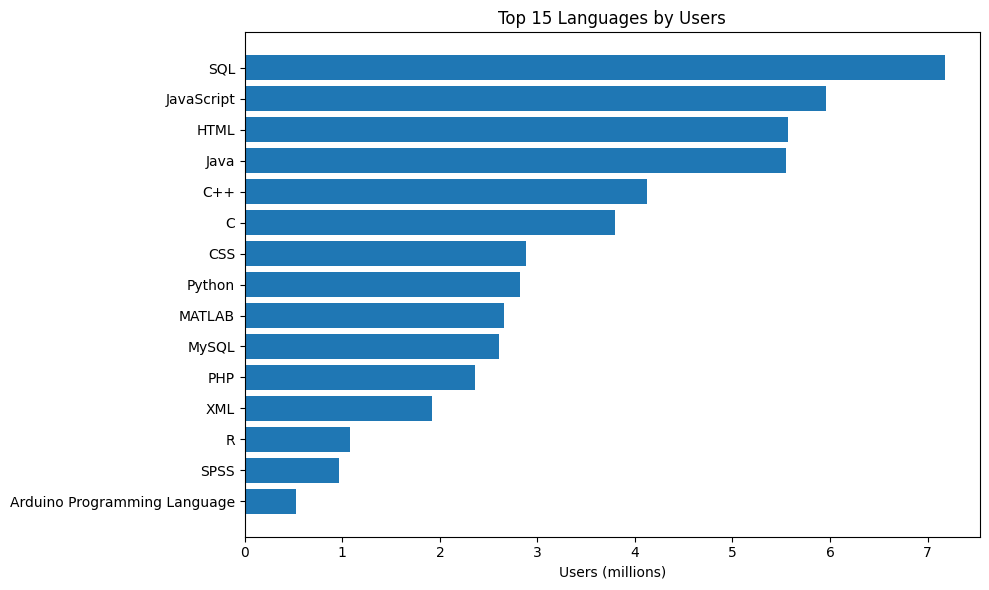

In [95]:
# visualize
plt.figure(figsize=(10, 6))
top15 = df.nlargest(15, 'number_of_users')
plt.barh(top15['title'], top15['number_of_users']/1e6)
plt.xlabel('Users (millions)')
plt.title('Top 15 Languages by Users')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [96]:
# by jobs
top_jobs = df.nlargest(10, 'number_of_jobs')[['title', 'number_of_jobs', 'number_of_users']]
print("Top 10 by jobs:")
print(top_jobs.to_string(index=False))

Top 10 by jobs:
     title  number_of_jobs  number_of_users
      HTTP          771996            33780
       SQL          219617          7179119
      Java           85206          5550123
      HTML           69531          5570873
JavaScript           63993          5962666
       C++           61098          4128238
         C           59919          3793768
     MySQL           47466          2608362
    Python           46976          2818037
       CSS           45617          2881846


SQL has the most users which is interesting since its a query language not a general purpose programming language. HTTP has crazy high job numbers (probably because web dev jobs mention it).

## 5. When Were Languages Created

In [97]:
# languages by decade
df['decade'] = (df['appeared'] // 10) * 10
decade_counts = df[df['decade'] >= 1950].groupby('decade').size()

print("Languages by decade:")
for decade, count in decade_counts.items():
    print(f"  {int(decade)}s: {count}")

Languages by decade:
  1950s: 86
  1960s: 282
  1970s: 433
  1980s: 693
  1990s: 794
  2000s: 736
  2010s: 1055
  2020s: 197


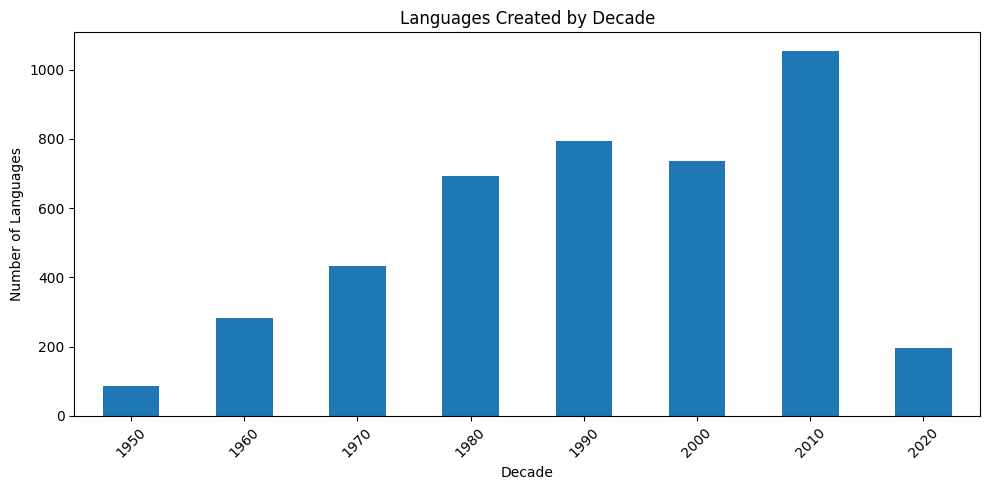

In [98]:
plt.figure(figsize=(10, 5))
decade_counts.plot(kind='bar')
plt.xlabel('Decade')
plt.ylabel('Number of Languages')
plt.title('Languages Created by Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The 2010s had the most new languages (over 1000). But the most popular languages are older.

In [109]:
# do older languages have more users?
df['age'] = 2024 - df['appeared']

# group by age
young = df[df['age'] <= 10]
middle = df[(df['age'] > 10) & (df['age'] <= 30)]
old = df[df['age'] > 30]

print("Language ages:")
print(f"- 10 yrs or less: {len(young)} languages, avg users: {round(young['number_of_users'].mean(), 0)}")
print(f"- 11–30 yrs: {len(middle)} languages, avg users: {round(middle['number_of_users'].mean(), 0)}")
print(f"- 30+ yrs: {len(old)} languages, avg users: {round(old['number_of_users'].mean(), 0)}")

Language ages:
- 10 yrs or less: 881 languages, avg users: 1544.0
- 11–30 yrs: 1573 languages, avg users: 16975.0
- 30+ yrs: 1849 languages, avg users: 16872.0


Older and middle-aged languages have way more users on average. Makes sense since they've had more time to build adoption.

## 6. Origin Communities

In [100]:
# who created the most languages?
origin_counts = df['origin_community'].value_counts().head(15)
print("Top origin communities:")
print(origin_counts)

Top origin communities:
origin_community
IBM                                      89
Microsoft                                55
Massachusetts Institute of Technology    46
Apple                                    21
Stanford University                      21
Google                                   19
Digital Equipment Corporation            17
Carnegie Mellon University               17
University of California, Berkeley       16
Bell Labs                                15
AT&T Bell Laboratories                   13
World Wide Web Consortium                11
Facebook                                 11
University of Washington                 11
Brown University                         11
Name: count, dtype: int64


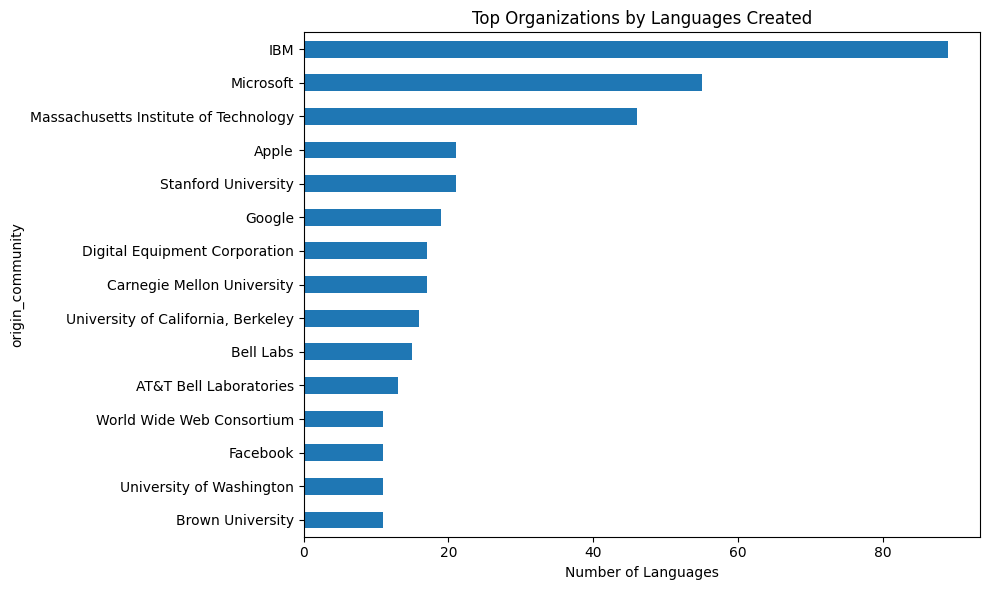

In [101]:
plt.figure(figsize=(10, 6))
origin_counts.plot(kind='barh')
plt.xlabel('Number of Languages')
plt.title('Top Organizations by Languages Created')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

IBM created the most languages (89), followed by Microsoft and MIT. Corporate labs and universities dominate.

## 7. Correlations

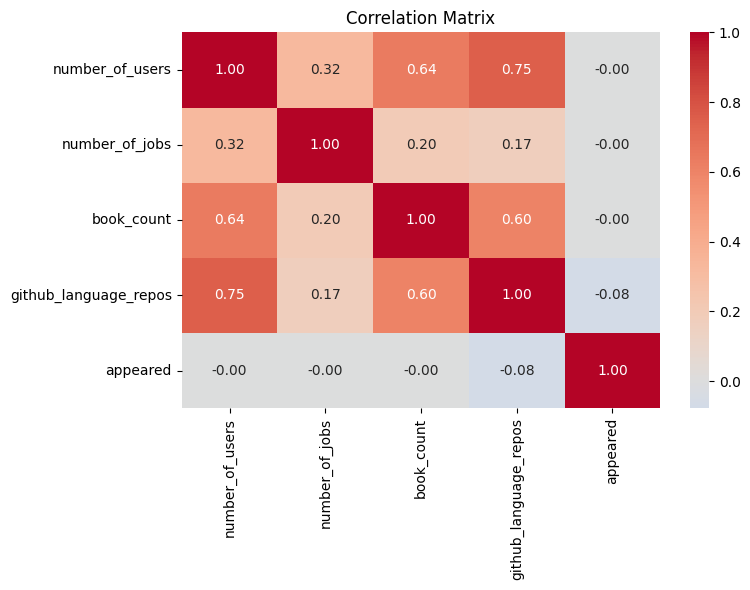

In [102]:
# what predicts success?
metrics = ['number_of_users', 'number_of_jobs', 'book_count', 'github_language_repos', 'appeared']
corr = df[metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [103]:
# correlations with users
print("Correlations with number_of_users:")
user_corr = corr['number_of_users'].sort_values(ascending=False)
print(user_corr)

Correlations with number_of_users:
number_of_users          1.000000
github_language_repos    0.752263
book_count               0.636983
number_of_jobs           0.324028
appeared                -0.001131
Name: number_of_users, dtype: float64


GitHub repos (0.75) and books (0.64) are the best predictors of users. Year appeared barely matters.

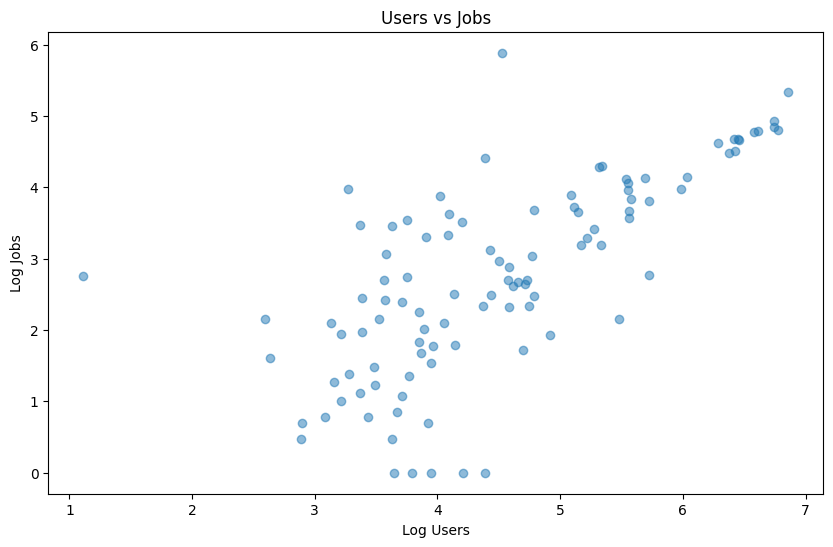

In [104]:
# scatter plot
plt.figure(figsize=(10, 6))
scatter_df = df[(df['number_of_users'] > 0) & (df['number_of_jobs'] > 0)]
plt.scatter(np.log10(scatter_df['number_of_users']),
            np.log10(scatter_df['number_of_jobs']), alpha=0.5)
plt.xlabel('Log Users')
plt.ylabel('Log Jobs')
plt.title('Users vs Jobs')
plt.show()

## 8. Outliers

In [105]:
# old but still popular
old_popular = df[(df['appeared'] < 1980) & (df['number_of_users'] > 100000)]
print(f"Pre-1980 languages with 100k+ users: {len(old_popular)}")
print(old_popular[['title', 'appeared', 'number_of_users']])

Pre-1980 languages with 100k+ users: 6
      title  appeared  number_of_users
2         C      1972          3793768
4       SQL      1974          7179119
14  Fortran      1957           165151
22    COBOL      1959           187188
31      SAS      1976           361103
90     SPSS      1968           965674


In [106]:
# new and already popular
new_popular = df[(df['appeared'] >= 2015) & (df['number_of_users'] > 10000)]
print(f"Post-2015 languages with 10k+ users: {len(new_popular)}")
print(new_popular[['title', 'appeared', 'number_of_users']].head(10))

Post-2015 languages with 10k+ users: 9
                title  appeared  number_of_users
74             Reason      2016            11216
137                 V      2019            36606
182               Zig      2015            23492
285  Embedded Crystal      2016            22212
498            Taichi      2019            26221
520               MDX      2017            16679
528    AssemblyScript      2017            15970
541            Svelte      2019            70695
598           Nushell      2019            24222


In [107]:
# books but no users
books_no_users = df[(df['book_count'] > 50) & (df['number_of_users'] < 10000)]
print(f"Languages with 50+ books but under 10k users: {len(books_no_users)}")
if len(books_no_users) > 0:
    print(books_no_users[['title', 'book_count', 'number_of_users']])

Languages with 50+ books but under 10k users: 12
            title  book_count  number_of_users
28         Pascal         145             7708
53   ActionScript         108             1630
54            VBA         270             3650
55          BASIC          57             7025
58         Delphi          88             7084
63            ASP          72             1865
159          FLEX          78             4402
163          ABAP          55             2416
166          GAME          99             8550
269        FoxPRO          53             1240
643           PIC          72              225
734         UNITY          59              210


Some interesting outliers. C, SQL, Fortran, COBOL are ancient but still have millions of users. VBA has lots of books but few users.

## Summary

Main findings from the EDA:

1. **Language types are imbalanced**: General-purpose programming languages (pl) dominate with 3,368 entries (78%), but query languages like SQL have far more users on average.

2. **Age doesn't predict success**: The correlation between year appeared and number of users is essentially zero (r = -0.001). The most popular languages (SQL, JavaScript, Java) are 25-30 years old.

3. **The 2010s saw explosive growth**: 1,055 new languages were created in the 2010s alone—more than any other decade. Yet young languages (≤10 years) average only 1,544 users vs. 16,975 for middle-aged languages.

4. **GitHub activity predicts adoption**: GitHub repos has the strongest correlation with users (r = 0.75), followed by book count (r = 0.64). Job postings show weaker correlation (r = 0.32).

5. **Corporate and academic labs dominate creation**: IBM (89), Microsoft (55), and MIT (46) are the top origin communities.

6. **Interesting outliers exist**: 6 pre-1980 languages have 100k+ users (C, SQL, Fortran, COBOL, SAS, SPSS). 12 languages have 50+ books but under 10k users (VBA, Pascal, BASIC).


## Business Questions

1. **Language Family Clustering**: Can we cluster languages into meaningful families based on origin community and technical features? Do these families correspond to programming paradigms or institutional origins (corporate vs. academic)?

2. **Success Factors**: What separates languages that get widely adopted from ones that stay obscure? Using dimensionality reduction on metrics like books, GitHub repos, and job postings, can we find different archetypes of successful languages?

3. **Innovation Patterns**: The 2010s had over 1,000 new languages but young languages average far fewer users. Are modern languages genuinely filling new niches, or is the market saturated? What do the 9 post-2015 languages with 10k+ users have in common?

4. **Outlier Detection**: VBA has 270 books but only 3,650 users. Svelte came out in 2019 and already has 70,695 users. What makes these outliers different from typical patterns? Are they niche tools, legacy artifacts, or emerging trends?